In [ ]:
# Springboard DSC Mini-Project:JSON
# Greg Gibson May 18th, 2020

In [119]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [120]:
# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')

In [ ]:
# json_df.info() reveals 500 records and countryshortname is non-null

In [121]:
# Find the 10 countries with most projects
# Method value_counts will count occurrences and sort descending order
most_projects = json_df.countryshortname.value_counts()
print(most_projects.head(10))

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64


In [122]:
# sum confirms the 500 records
print(most_projects.sum())

500


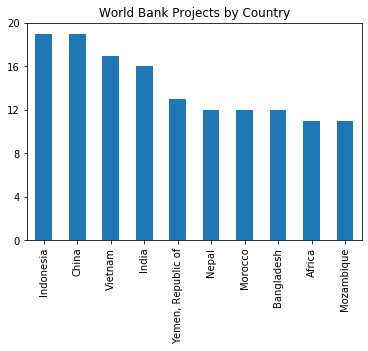

In [123]:
# plot as a bar chart
most_projects.head(10).plot(kind = 'bar', title = 'World Bank Projects by Country', yticks = [0, 4, 8, 12, 16, 20])

In [124]:
# Find the top 10 major project themes (using column 'mjtheme_namecode')
# This column is nested elements, use normalization example to create table
json_str = json.load((open('data/world_bank_projects.json')))
name_code = pd.json_normalize(json_str, 'mjtheme_namecode')


In [125]:
# The data has blanks which will be resolved with sorting and fill backward
name_code.sort_values(['code', 'name'], inplace = True)
name_code.name.replace('', np.NaN, inplace = True)
name_code.name.fillna(method='bfill', inplace=True)

In [126]:
# Count records, total > 500 due to multiple major themes listed per project
mjtheme_count = name_code.name.value_counts()
print(mjtheme_count)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64


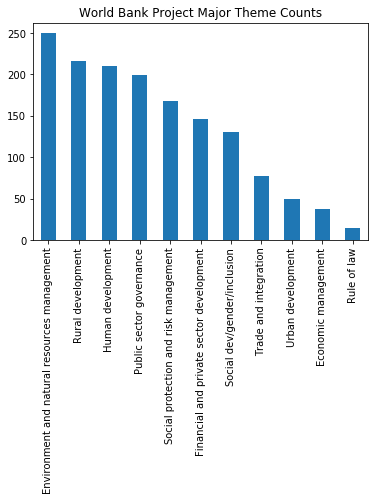

In [127]:
# plot as a bar chart
mjtheme_count.plot(kind = 'bar', title = 'World Bank Project Major Theme Counts')